# colab에서 돌리는 것을 추천

In [1]:
!pip install tensorflow==2.7.0

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=fafa27385867877a7a71017814bed9519213d0e879fcae17ceb330a4cfc2b547
  Stored in directory: c:\users\hotelbread\appdata\local\pip\cache\wheels\3f\e3\ec\8a8336ff196023622fbcb36de0c5a5c218cbb24111d1d4c7f2
Successfully built termcolor


In [23]:
!pip install pillow

In [70]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

from PIL import Image
import pathlib

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.models import Model
import itertools
import os
import shutil
import cv2

In [2]:
# 한글 폰트 적용하기
import platform
platform.system()

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [3]:
model = tf.keras.models.load_model('mobileNetV2_식재료 분류모델(보완).h5')

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                                 
Total params: 2,270,794
Trainable params: 12,810
Non-trainable params: 2,257,984
_________________________________________________________________


In [4]:
# 이미지 파일이 한글일 경우 UNICODE-8으로 디코딩
def  imread_hangul_path(path):
    with open(path, "rb") as fp:
        bytes = bytearray(fp.read())
        numpy_array = np.asarray(bytes, dtype=np.uint8)
    return cv2.imdecode(numpy_array, cv2.IMREAD_UNCHANGED)

In [49]:
name_code = {'갈비찜': 0, '계란찜': 1, '김치찜': 2, '꼬막찜': 3, '닭볶음탕': 4, '수육': 5, '순대': 6, '족발': 7, '찜닭': 8, '해물찜': 9}
# ingredient_list = train_data.class_names

def predict_food(ingredient_name):
    
    img_path = 'data/'+ ingredient_name
    new_img = image.load_img(img_path, target_size=(299,299))
    arr_img = image.img_to_array(new_img)
    img = arr_img.reshape((1,) + arr_img.shape)
    img = img.astype('float32')/255
    
    num_code = model.predict(img, batch_size=70, verbose=1).argmax()  # 왜 프로바가 없다고 나오는 걸까
    proba = model.predict(img).max() * 100
    
    for key, value in name_code.items():
        if num_code == value: name = key
    
    name = name.replace('_', ' ')
    result = name
    print('\nPredicted Image: ')
    
    show_img = imread_hangul_path(img_path)
    plt.imshow(cv2.cvtColor(show_img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()
       
    print(f'This is: {name} \nWith a probability of: {proba}')
    return result

In [23]:
print(name_code)

{'갈비찜': 0, '계란찜': 1, '김치찜': 2, '꼬막찜': 3, '닭볶음탕': 4, '수육': 5, '순대': 6, '족발': 7, '찜닭': 8, '해물찜': 9}


In [24]:
# key-value 뒤집기
class_names = {v: k for k, v in name_code.items()}
# {v: k for k, v in map.class_dict()}
class_names

{0: '갈비찜',
 1: '계란찜',
 2: '김치찜',
 3: '꼬막찜',
 4: '닭볶음탕',
 5: '수육',
 6: '순대',
 7: '족발',
 8: '찜닭',
 9: '해물찜'}

In [50]:
img = input('사진이름 넣기 : ')

사진이름 넣기 : DSC_0141.jpg


1/1 [==============================] - 0s 79ms/step

Predicted Image: 


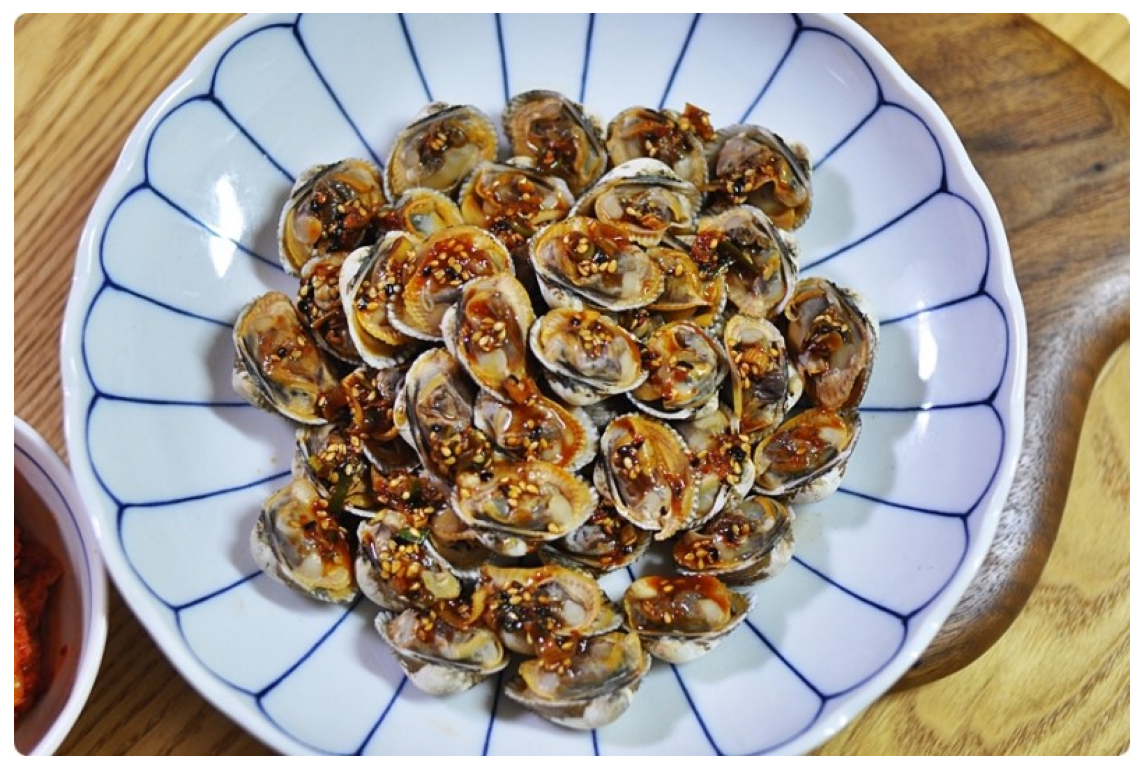

This is: 꼬막찜 
With a probability of: 99.89608526229858


In [51]:
plt.figure(figsize=(10, 10))

predict_food = predict_food(img)

plt.show()

In [15]:
predict_food

'꼬막찜'

In [54]:
!pip install nltk==3.4

  Created wheel for nltk: filename=nltk-3.4-py3-none-any.whl size=1436397 sha256=dcced7a188478cecff33ff676879dd9deee72341f828c263a74e4b50af734cc9
  Stored in directory: c:\users\hotelbread\appdata\local\pip\cache\wheels\13\b8\81\2349be11dd144dc7b68ab983b58cd2fae353cdc50bbdeb09d0
Successfully built nltk


In [57]:
!pip install pandas

In [59]:
!pip install sklearn

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Using cached threadpoolctl-3.0.0-py3-none-any.whl (14 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=44847532504fe9bb24ca54b18aaf342e238044307be1d2a3f303aa00bf8234dc
  Stored in directory: c:\users\hotelbread\appdata\local\pip\cache\wheels\46\ef\c3\157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [7]:
import re
import nltk
from nltk.corpus import stopwords
from collections import Counter

import pandas as pd
import string

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [8]:
df = pd.read_csv("wine_newname_final.csv")
df.head()

,url,wine_id,price,score,grapes,country,region,alcohol,foods,re,s_price,s_score,s_alcohol,rev_s_alcohol,rev_s_price,name,winery
0,https://www.vivino.com/US-CA/en/piedrasassi-ri...,19603399.0,52.99,4.3,Shiraz/Syrah,United States,Arroyo Grande Valley,13.500000,"['Beef', 'Lamb', 'Game (deer, venison)', 'Poul...",['Dry tingly cool bottle pairs with seafood ho...,0.004801,0.333333,0.237968,0.762032,0.995199,Rim Rock Vineyard Syrah 2017,Piedrasassi
1,https://www.vivino.com/US-CA/en/giraud-traditi...,18191466.0,54.99,4.2,Grenache,France,Ch창teauneuf-du-Pape,13.491631,"['Lamb', 'Pork', 'Poultry']","['Black cherry, oak. Leather, earthy. Great b...",0.005003,0.222222,0.237744,0.762256,0.994997,Tradition Châteauneuf-du-Pape 2015,Domaine Giraud
2,https://www.vivino.com/US-CA/en/brandlin-estat...,13886692.0,73.95,4.3,Cabernet Sauvignon,United States,Mount Veeder,13.491631,"['Beef', 'Lamb', 'Game (deer, venison)', 'Matu...",['Wine walk favorite! This estate cab is fant...,0.006919,0.333333,0.237744,0.762256,0.993081,Estate Cabernet Sauvignon 2013,Brandlin
3,https://www.vivino.com/US-CA/en/feudo-croce-im...,25311528.0,19.99,4.2,Primitivo,Italy,Primitivo di Manduria,14.500000,"['Beef', 'Pasta', 'Lamb', 'Poultry']","['Plum, fig, pepper, cherry. ', 'Lots of dark ...",0.001465,0.222222,0.264706,0.735294,0.998535,Imperio LXXIV Primitivo di Manduria 2018,Feudo Croce
4,https://www.vivino.com/US-CA/en/mamete-prevost...,25588649.0,58.50,4.3,Nebbiolo,Italy,Sforzato della Valtellina,13.491631,"['Beef', 'Lamb', 'Game (deer, venison)', 'Poul...",['A bit of a disappointment honestly. Have rea...,0.005358,0.333333,0.237744,0.762256,0.994642,Corte di Cama Sforzato di Valtellina 2016,Mamete Prevostini


In [10]:
alcohol_min = float(input("알코올 도수 최솟값을 입력해주세요!! : "))
alcohol_max = float(input("알코올 도수 최댓값을 입력해주세요!! : "))
price_min = float(input("가격 최솟값을 입력해주세요!! : "))
price_max = float(input("가격 최댓값을 입력해주세요!! : "))
review_tagname = input("이번 파티의 핵심 단어를 입력해주세요!! : ")

알코올 도수 최솟값을 입력해주세요!! : 10
알코올 도수 최댓값을 입력해주세요!! : 17
가격 최솟값을 입력해주세요!! : 20
가격 최댓값을 입력해주세요!! : 150
이번 파티의 핵심 단어를 입력해주세요!! : halloween


In [3]:
name_code = {'갈비찜': 0, '계란찜': 1, '김치찜': 2, '꼬막찜': 3, '닭볶음탕': 4, '수육': 5, '순대': 6, '족발': 7, '찜닭': 8, '해물찜': 9}
food_catagories = {'갈비찜':'Beef','계란찜':'Pork', '김치찜':'Spicy food', '꼬막찜':'Shellfish', 
                   '닭볶음탕':['Spicy fodd', 'Poultry'], '수육':'Pork', '순대':'Pork', '족발':'Pork',
                   '찜닭':'Poultry', '해물찜':'Spicy food'}

# Beef
# Lamb
# Veal
# Pork
# Game (deer, venison)
# Poultry
# Mushrooms
# Cured meat
# Goat Cheese
# Mature and hard cheese
# Mild and soft cheese
# Pasta
# Spicy food
# Aperitif
# Appetizers and snacks
# Lean fish
# Rich fish(Salmon, tuna etc)
# Shellfish
# Vegetarian

In [5]:
predict_food = "닭볶음탕"

In [6]:
food_name = food_catagories.get(predict_food)
if type(food_name) == str:
    food_name = [food_name]


food_name

['Spicy fodd', 'Poultry']

In [11]:
sim = [food_name,review_tagname.split(" ")]

In [12]:
df = df[(df['alcohol'] >= alcohol_min) & (df['alcohol'] <= alcohol_max)]
df = df[(df['price'] >= price_min) & (df['price'] <= price_max) ]

In [13]:
#불용어 제거 

nltk.download('stopwords')

#from nltk.corpus import stopwords

stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\삼성전자\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [14]:
def cosine_func(col_name):
    
    #정규 표현식으로 영문만 남음
    only_english  = [ re.sub('[^a-zA-Z]', ' ',sentence).lower() for sentence in df[col_name]]
    #토큰만들기
    col_tokenized = [ nltk.word_tokenize(item) for item in only_english ] 
    #불용어 빼기
    no_stopwords = [ i for i in col_tokenized if i not in stopwords]
    #다시 합쳐주기
    final_review = [ ' '.join(item) for item in no_stopwords ]
#     final_review = nltk.Text(no_stopwords) # corpus 생성
    
    #Tfidf
    tfidf_vect = TfidfVectorizer()
    feature_vect = tfidf_vect.fit_transform(final_review)
    if col_name == 'foods':
        my_vect = tfidf_vect.transform(sim[0])
    else:
        my_vect = tfidf_vect.transform(sim[1])
    
    #코사인 유사도 분석 => 사용자가 입력한 와인과 전체 
    similarity_simple_pair = cosine_similarity(my_vect, feature_vect)
    result_list = similarity_simple_pair.tolist()[0]
    df[f'{col_name}_result'] = result_list
    
    return df

In [15]:
# 데이터프레임에 유사도 추가
my_col = ['foods','re']
for target_col in my_col:
    cosine_func(target_col)

In [16]:
result_arr = []
for column in df.columns.values:
    if (df[column].dtype == 'float64') |  (df[column].dtype == 'int64'):
        if(column != 'wine_id'):
            result_arr.append(column)

In [17]:
result_arr=["s_score","s_alcohol","s_price","foods_result","re_result"]

In [18]:
df_result_weight = df[result_arr].copy()
df_result_weight.head()

,s_score,s_alcohol,s_price,foods_result,re_result
0,0.333333,0.237968,0.004801,0.0,0.0
1,0.222222,0.237744,0.005003,0.0,0.0
2,0.333333,0.237744,0.006919,0.0,0.0
4,0.333333,0.237744,0.005358,0.0,0.0
5,0.222222,0.224599,0.002595,0.0,0.0


In [129]:
df['weight'] = df_result_weight['s_score']*0.1
df['weight'] += df_result_weight['s_alcohol']*0.1
df['weight'] += df_result_weight['s_price']*10
df['weight'] += df_result_weight['foods_result']*0.1*10
df['weight'] += df_result_weight['re_result']*1

In [142]:
# df_result_weight['weight'] = df_result_weight['s_score']*0.1
# df_result_weight['weight'] += df_result_weight['s_alcohol']*0.1
# df_result_weight['weight'] += df_result_weight['s_price']*10
# df_result_weight['weight'] += df_result_weight['foods_result']*0.1*10
# df_result_weight['weight'] += df_result_weight['re_result']*1

In [143]:
# df_result_weight = df_result_weight.sort_values(by='weight' ,ascending=False)
# df_result_weight.head()

,s_score,s_alcohol,s_price,foods_result,re_result,weight
21933,0.333333,0.237744,0.004801,0.743402,0.0,0.848516
17905,0.222222,0.211230,0.005509,0.743402,0.0,0.841838
20428,0.333333,0.237744,0.003382,0.743402,0.0,0.834326
19839,0.222222,0.237968,0.002476,0.743402,0.0,0.814182
23195,0.222222,0.237968,0.001568,0.743402,0.0,0.805096


In [19]:
df_sorted_by_values = df.sort_values(by='weight' ,ascending=False)

KeyError: 'weight'

In [ ]:
df_sorted_by_values[:6]